https://github.com/keras-team/keras-docs-ko/blob/master/sources/getting-started/sequential-model-guide.md
인공지능 설명 및 코드 참고용

In [1]:
import pandas as pd
import numpy as np

In [2]:
# 폐암인지 아닌지를 판단하는 모델임
pd.read_csv('DL_data/data/ThoraricSurgery3.csv')
data_set = np.loadtxt('DL_data/data/ThoraricSurgery3.csv', delimiter=',')
data_set

array([[ 1.  ,  2.88,  2.16, ...,  0.  , 60.  ,  0.  ],
       [ 2.  ,  3.4 ,  1.88, ...,  0.  , 51.  ,  0.  ],
       [ 2.  ,  2.76,  2.08, ...,  0.  , 59.  ,  0.  ],
       ...,
       [ 2.  ,  3.04,  2.08, ...,  0.  , 52.  ,  0.  ],
       [ 2.  ,  1.96,  1.68, ...,  0.  , 79.  ,  0.  ],
       [ 2.  ,  4.72,  3.56, ...,  0.  , 51.  ,  0.  ]])

In [3]:
data_set.shape

(470, 17)

In [4]:
X = data_set[:,:16]
y = data_set[:,16] # 맨 뒷열이 타겟열임
X

array([[ 1.  ,  2.88,  2.16, ...,  1.  ,  0.  , 60.  ],
       [ 2.  ,  3.4 ,  1.88, ...,  1.  ,  0.  , 51.  ],
       [ 2.  ,  2.76,  2.08, ...,  1.  ,  0.  , 59.  ],
       ...,
       [ 2.  ,  3.04,  2.08, ...,  0.  ,  0.  , 52.  ],
       [ 2.  ,  1.96,  1.68, ...,  1.  ,  0.  , 79.  ],
       [ 2.  ,  4.72,  3.56, ...,  1.  ,  0.  , 51.  ]])

In [5]:
y

array([0., 0., 0., 0., 1., 0., 1., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 1., 0., 0., 1., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 1., 1., 0., 1., 0., 0., 0., 1., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 1., 0., 0., 1., 0., 0., 0., 0., 0., 0., 1.,
       0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 0., 0., 1., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0., 0., 1., 0., 0., 0.,
       0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 1., 1.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
       0., 0., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.,
       0., 0., 0., 0., 1., 0., 0., 0., 1., 1., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 1., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 1.,
       0., 0., 0., 0., 0.

In [6]:
from tensorflow.keras.models import Sequential  # 텐서플로의 케라스 API에서 필요한 함수들을 불러옵니다.
from tensorflow.keras.layers import Dense       # 데이터를 다루는데 필요한 라이브러리를 불러옵니다.

In [7]:
import tensorflow as tf
tf.__version__

'2.8.0'

In [8]:
model = Sequential()

In [9]:
# 입력 데이터는 차원을 입력해야되는데 현재는 차원이 16차원이므로 16의 입력 레이어임
# 히든 레이어는 몇 차원(노드수)으로 지정할 것인지 이는 직접 지정해줘야 함
# 그리고 다음 레이어로 넘어갈 땐 주로 relu를 사용하고 결과를 출력할 때 softmax, sigmoid 등을 이용함
# relu는 가중치가 음수면 0, 양수면 그대로 사용하는 활성함수임

# model.add(Dense(다음층 노드수, input_dim=차원수, activation='relu'))
model.add(Dense(32, input_dim=16, activation='relu')) # 2의 지수 단위로 유닛을 정해주는 것이 관례임
# 16개의 특징값으로 구성된 470건의 데이터를 32개의 일반화된 특징으로 표현
# 32가지의 선(수평, 수직, 원형,..)
model.add(Dense(16, activation='relu'))
# 32개의 일반화된 특징을 압축하여 16가지 특징으로 표현
# 32가지 선의 조합으로 구성된 도형(사각형, 오각형, ...)

In [10]:
model.add(Dense(1, activation='sigmoid'))
# 8가지 도형의 조합으로 표현된 형상(눈, 코, 입, .. 얼굴..)

# 그럼 여기서 weight(가중치)의 개수는 하나의 레이어당 몇개일까?
# 하나하나의 노드끼리 연결되며 가중치를 부여하므로 여기서 사용된 코드에 의하면 16*32=512임
# https://jh2021.tistory.com/3
# 대충 설명하자면 활성함수가 어느때라도 작동하도록 돕는 역할을 하는 것임
# 두번째 레이어부터는 input_dim을 신경쓸 필요가 없음. 즉 출력 노드수만 신경쓰면 됨

In [11]:
model.summary()
# 위 코드를 진행하면 파라미터가 어떻게 연산이 되었는지 알수 있음
# 정확히는 16*32+32인데 입력노드수 * 출력노드수 + 편향값(=출력노드*1(=편향값인데 기본 1이며 노드개수에 따라 더해지는 값이 달라짐))
# '딥러닝 모델 = 깊은 신경망(히든 계층이 2개 이상)으로 학습된 모델의 가중치 변수로 표현된 수식(함수)' 이라고 볼 수 있음
# 참고로 다시 모델을 생성할 땐 Sequential()을 다시 실행해야됨
# Output Shape에 있는 Output에서 None은 무엇일까? = 행의 개수를 의미하는데 딥러닝 모델은 주로 행을 무시하고 열의 shape를 맞추려고함(그림이랑 같다고 보면됨)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 32)                544       
                                                                 
 dense_1 (Dense)             (None, 16)                528       
                                                                 
 dense_2 (Dense)             (None, 1)                 17        
                                                                 
Total params: 1,089
Trainable params: 1,089
Non-trainable params: 0
_________________________________________________________________


In [12]:
# 모델 실행
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
# 손실함수 = 이진 분류(로그함수로 쓰겠다는 것임)
# 옵티마이저 = 이미지 참고

https://pgnv.tistory.com/43 짤

![옵티마이저](https://east-rain.github.io/docs/Deep%20Learning/basic%20deeplearning/optimization/optimizer.jpg)

![옵티마이저2](https://velog.velcdn.com/images/freesky/post/762c7c9b-6276-4343-aa9d-9fda9684cb3f/image.gif)

In [13]:
hist= model.fit(X,y, epochs=10, batch_size=16)
# 배치사이즈가 16이니 다음 레이어의 노드에게 16개의 노드 데이터를 한번에 넘겨서 연결을 진행하는 것임
# 데이터: 470건
# 1epoch : 470건의 데이터 전체에 대해 훈련이 진행
# 배치사이즈: 1번의 훈련에 사용되는 데이터 건수
# 배치사이즈20: 1번 훈련에 사용되는 데이터가 20건
# 20건의 데이터에 대한 예측 결과와 실제 결과의 차이인 에러를 계산
# -> 에러를 줄이기 위해 역전파를 1번 수행하면서 가중치가 업데이트 됨

# 따라서 1epoch에는 배치가 약 24번 일어남(=학습이 23번 이뤄짐) => 역전파가 23번 수행됨
# 참고로 순전파는 계산이라고 하지 않음(전달만 하는 것임)
# 그래서 학습이 이뤄지는 횟수는 정확히는 235번 이뤄진다고 함 (470 * 10 /20)

Epoch 1/10
30/30 [==============================] - 1s 2ms/step - loss: 0.4643 - accuracy: 0.8511
Epoch 2/10
30/30 [==============================] - 0s 2ms/step - loss: 0.4465 - accuracy: 0.8511
Epoch 3/10
30/30 [==============================] - 0s 2ms/step - loss: 0.4742 - accuracy: 0.8511
Epoch 4/10
30/30 [==============================] - 0s 2ms/step - loss: 0.4343 - accuracy: 0.8468
Epoch 5/10
30/30 [==============================] - 0s 2ms/step - loss: 0.4262 - accuracy: 0.8511
Epoch 6/10
30/30 [==============================] - 0s 2ms/step - loss: 0.4625 - accuracy: 0.8511
Epoch 7/10
30/30 [==============================] - 0s 2ms/step - loss: 0.4363 - accuracy: 0.8511
Epoch 8/10
30/30 [==============================] - 0s 2ms/step - loss: 0.4345 - accuracy: 0.8511
Epoch 9/10
30/30 [==============================] - 0s 2ms/step - loss: 0.4115 - accuracy: 0.8511
Epoch 10/10
30/30 [==============================] - 0s 2ms/step - loss: 0.4351 - accuracy: 0.8532


In [14]:
# 하이퍼파라미터는 주로 epoch 수, batch_size 등
# 배치사이즈는 한건한건에 대한 데이터를 확인하면서 업데이트를 할수도 있지만 
# 예시로 말하면 문제 풀고 채점을 할때, 한문제 풀고 한문제 채점할수도 있지만 여러문제를 풀고 한번에 채점하는 방법이 있듯,
# 여러문제를 한번에 채점하는 것이 속도 면에서도 빠름(재미도 있고)
# 배치사이즈가 1이라면 넘파이의 장점을 활용할 수 없음. 또한 과적합이 진행될 수도 있음
# 배치사이즈가 너무 크면 한건한건의 에러가 나와 여러개를 한번에 업데이트를 진행함
# (20이라면 20개의 에러값이 출력됨 이를. 한번에 업데이트를 함. 이 과정에서 20개의 데이터에 대한 각각의 상세정보가 반영되기 어려움)
# 이에 따라 속도는 빠르지만 정확하게 각각의 특성을 반영하지 못하게 되며 메모리가 무거워짐
# gpu는 행렬연산을 진행하며 행렬연산이 빠름
# 대체로 훈련을 할수록 loss는 점차 떨어짐. 그러나 어느 시점을 넘기면 올라가기도 함
# loss가 0이라면 데이터를 표현하는 완벽한 모델이 만들어진 것임; 
# 특히 직선위에 올라있는 점들의 모임같은 경우는 loss가 0이 될 수 있음(완전 선형 데이터)

In [ ]:
# 최소제곱법, 선형회귀, 신경망 등을 다시 공부할 것임

https://github.com/gilbutITbook/080324/blob/master/ch04.ipynb?short_path=5527740
https://fliphtml5.com/cygnl/aiuv/%EB%AA%A8%EB%91%90%EC%9D%98_%EB%94%A5%EB%9F%AC%EB%8B%9D_by_%EC%A1%B0%ED%83%9C%ED%98%B8_%28z-lib.org%29/https://fliphtml5.com/cygnl/aiuv/%EB%AA%A8%EB%91%90%EC%9D%98_%EB%94%A5%EB%9F%AC%EB%8B%9D_by_%EC%A1%B0%ED%83%9C%ED%98%B8_%28z-lib.org%29/#google_vignette
아래는 위 코드를 참고

In [15]:
# 공부한 시간과 점수를 각각 x, y라는 이름의 넘파이 배열로 만듭니다.
x = np.array([2, 4, 6, 8])
y = np.array([81, 93, 91, 97])
# 다섯시간했다면 몇점? 나라면 유클리드 거리를 이용해서 거리를 계산하고 최소제곱법에 따라 최적의 답을 구한뒤 이에 맞는 답을 구할 듯
# 위와 같은 경우는 선형회귀를 만들어야 함.
# 결국 모델 예측값과 실제값의 차이를 최소로하는 함수가 필요함

In [16]:
#x의 평균값을 구합니다.
mx = np.mean(x)

#y의 평균값을 구합니다.
my = np.mean(y)

# 출력으로 확인합니다.
print("x의 평균값:", mx)
print("y의 평균값:", my)

x의 평균값: 5.0
y의 평균값: 90.5


In [17]:
# 기울기 공식의 분모 부분입니다.
divisor = sum([(i - mx)**2 for i in x])

# 기울기 공식의 분자 부분입니다.
def top(x, mx, y, my):
    d = 0
    for i in range(len(x)):
        d += (x[i] - mx) * (y[i] - my)
    return d
dividend = top(x, mx, y, my)

# 출력으로 확인합니다.
print("분모:", divisor)
print("분자:", dividend)

분모: 20.0
분자: 46.0


In [18]:
# 기울기 a를 구하는 공식입니다.
a = dividend / divisor

# y절편 b 를 구하는 공식입니다.
b = my - (mx*a)

# 출력으로 확인합니다.
print("기울기 a =", a)
print("y절편 b =", b)

기울기 a = 2.3
y절편 b = 79.0


In [20]:
# y=ax + b에 가상의 a,b 값을 대입한 결과를 출력하는 함수입니다.
def predict(x):
    # return fake_a * x + fake_b
    return a * x + b

# 예측 값이 들어갈 빈 리스트를 만듭니다.
predict_result = []

# 모든 x값을 한 번씩 대입하여 predict_result 리스트를 완성합니다.
for i in range(len(x)):
    predict_result.append(predict(x[i]))
    print("공부시간=%.f, 실제점수=%.f, 예측점수=%.f" % (x[i], y[i], predict(x[i])))

공부시간=2, 실제점수=81, 예측점수=84
공부시간=4, 실제점수=93, 예측점수=88
공부시간=6, 실제점수=91, 예측점수=93
공부시간=8, 실제점수=97, 예측점수=97


In [22]:
predict(5) # 90.5

90.5

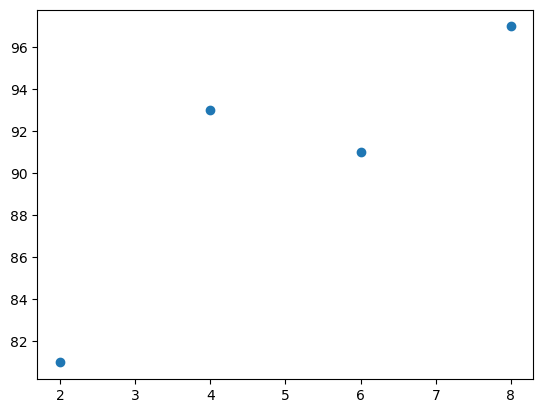

In [23]:
import matplotlib.pyplot as plt
plt.scatter(x,y)

wx+b는 무슨 형태인가? = 선형형태이다
0x+0이면? y가 무조건 0인 수평

In [38]:
# 기울기 a와 절편 b의 값을 초기화합니다.
a = 0
b = 0

#학습률을 정합니다.
lr = 0.01

#몇 번 반복될지를 설정합니다. 
epochs = 2001

In [39]:
# x 값이 총 몇 개인지 셉니다.
n=len(x)

#경사 하강법을 시작합니다.
for i in range(epochs):                  # epoch 수 만큼 반복
    
    y_pred = a * x + b                   # 예측 값을 구하는 식입니다. 
    error = y - y_pred                   # 실제 값과 비교한 오차를 error로 놓습니다.
    
    a_diff = (2/n) * sum(-x * (error))   # 오차 함수를 a로 편미분한 값입니다. 즉 편미분 수식이 이것임
    b_diff = (2/n) * sum(-(error))       # 오차 함수를 b로 편미분한 값입니다. 
    
    a = a - lr * a_diff     # 학습률을 곱해 기존의 a 값을 업데이트합니다.
    b = b - lr * b_diff     # 학습률을 곱해 기존의 b 값을 업데이트합니다.
    
    if i % 100 == 0:        # 100번 반복될 때마다 현재의 a 값, b 값을 출력합니다.
        print("epoch=%.f, 기울기=%.04f, 절편=%.04f" % (i, a, b))
        # plt.plot(x,y_pred, 'r')
        # plt.show()

epoch=0, 기울기=9.2800, 절편=1.8100
epoch=100, 기울기=11.5301, 절편=23.9186
epoch=200, 기울기=8.9703, 절편=39.1944
epoch=300, 기울기=7.1204, 절편=50.2337
epoch=400, 기울기=5.7836, 절편=58.2115
epoch=500, 기울기=4.8175, 절편=63.9768
epoch=600, 기울기=4.1193, 절편=68.1432
epoch=700, 기울기=3.6148, 절편=71.1541
epoch=800, 기울기=3.2501, 절편=73.3300
epoch=900, 기울기=2.9866, 절편=74.9025
epoch=1000, 기울기=2.7962, 절편=76.0388
epoch=1100, 기울기=2.6586, 절편=76.8601
epoch=1200, 기울기=2.5591, 절편=77.4535
epoch=1300, 기울기=2.4873, 절편=77.8824
epoch=1400, 기울기=2.4353, 절편=78.1924
epoch=1500, 기울기=2.3978, 절편=78.4163
epoch=1600, 기울기=2.3707, 절편=78.5782
epoch=1700, 기울기=2.3511, 절편=78.6952
epoch=1800, 기울기=2.3369, 절편=78.7797
epoch=1900, 기울기=2.3267, 절편=78.8408
epoch=2000, 기울기=2.3193, 절편=78.8850


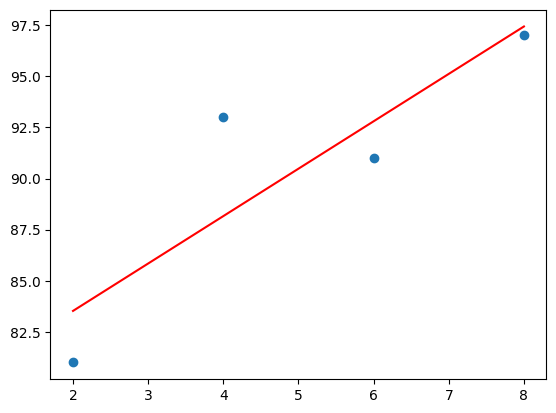

In [41]:
plt.scatter(x,y)
plt.plot(x,y_pred, 'r')
plt.show()

In [42]:
x1 = np.array([2, 4, 6, 8])
x2 = np.array([0, 4, 2, 3])
y = np.array([81, 93, 91, 97])

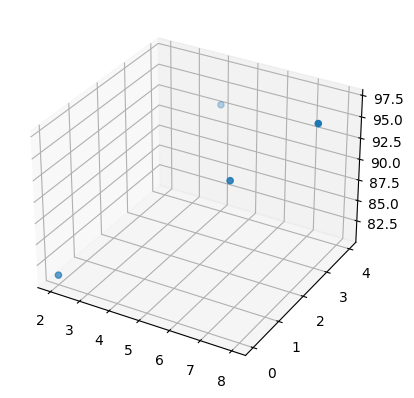

In [43]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter3D(x1, x2, y)
plt.show()

In [44]:
# 기울기 a와 절편 b의 값을 초기화합니다.
a1 = 0
a2 = 0
b = 0

#학습률을 정합니다.
lr = 0.01 

#몇 번 반복될지를 설정합니다.
epochs = 2001

In [45]:
# x 값이 총 몇 개인지 셉니다. x1과 x2의 수가 같으므로 x1만 세겠습니다. 
n=len(x1)

#경사 하강법을 시작합니다.
for i in range(epochs):                  # epoch 수 만큼 반복
    
    y_pred = a1 * x1 + a2 * x2 + b       #예측 값을 구하는 식을 세웁니다
    error = y - y_pred                   #실제 값과 비교한 오차를 error로 놓습니다.
    
    a1_diff = (2/n) * sum(-x1 * (error)) # 오차함수를 a1로 편미분한 값입니다. 
    a2_diff = (2/n) * sum(-x2 * (error)) # 오차함수를 a2로 편미분한 값입니다. 
    b_diff = (2/n) * sum(-(error))       # 오차함수를 b로 편미분한 값입니다. 
    
    a1 = a1 - lr * a1_diff  # 학습률을 곱해 기존의 a1 값을 업데이트합니다.
    a2 = a2 - lr * a2_diff  # 학습률을 곱해 기존의 a2 값을 업데이트합니다.
    b = b - lr * b_diff     # 학습률을 곱해 기존의 b 값을 업데이트합니다.
    
    if i % 100 == 0:        # 100번 반복될 때마다 현재의 a1, a2, b 값을 출력합니다.
        print("epoch=%.f, 기울기1=%.04f, 기울기2=%.04f, 절편=%.04f" % (i, a1, a2, b))

epoch=0, 기울기1=9.2800, 기울기2=4.2250, 절편=1.8100
epoch=100, 기울기1=9.5110, 기울기2=5.0270, 절편=22.9205
epoch=200, 기울기1=7.3238, 기울기2=4.2950, 절편=37.8751
epoch=300, 기울기1=5.7381, 기울기2=3.7489, 절편=48.7589
epoch=400, 기울기1=4.5844, 기울기2=3.3507, 절편=56.6800
epoch=500, 기울기1=3.7447, 기울기2=3.0608, 절편=62.4448
epoch=600, 기울기1=3.1337, 기울기2=2.8498, 절편=66.6404
epoch=700, 기울기1=2.6890, 기울기2=2.6962, 절편=69.6938
epoch=800, 기울기1=2.3653, 기울기2=2.5845, 절편=71.9160
epoch=900, 기울기1=2.1297, 기울기2=2.5032, 절편=73.5333
epoch=1000, 기울기1=1.9583, 기울기2=2.4440, 절편=74.7103
epoch=1100, 기울기1=1.8336, 기울기2=2.4009, 절편=75.5670
epoch=1200, 기울기1=1.7428, 기울기2=2.3695, 절편=76.1904
epoch=1300, 기울기1=1.6767, 기울기2=2.3467, 절편=76.6441
epoch=1400, 기울기1=1.6286, 기울기2=2.3301, 절편=76.9743
epoch=1500, 기울기1=1.5936, 기울기2=2.3180, 절편=77.2146
epoch=1600, 기울기1=1.5681, 기울기2=2.3092, 절편=77.3895
epoch=1700, 기울기1=1.5496, 기울기2=2.3028, 절편=77.5168
epoch=1800, 기울기1=1.5361, 기울기2=2.2982, 절편=77.6095
epoch=1900, 기울기1=1.5263, 기울기2=2.2948, 절편=77.6769
epoch=2000, 기울기1=1.5191, 기울기2=2.2

In [47]:
# 1_pred = 1.5191 * x1 + 2.2923 * x2 + 77.7260
print(y) # [81 93 91 97]
y_pred # array([80.76387645, 92.97153922, 91.42520875, 96.7558749 ])

[81 93 91 97]


array([80.76387645, 92.97153922, 91.42520875, 96.7558749 ])

In [48]:
# 딥러닝 프레임워크(keras)로 선형 회귀 모델 생성

In [49]:
#텐서플로의 케라스 API에서 필요한 함수들을 불러 옵니다.
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [50]:
x = np.array([2, 4, 6, 8])
y = np.array([81, 93, 91, 97])

In [54]:
model = Sequential()

In [55]:
model.add(Dense(1, input_dim=1, activation='linear'))

# y_pred = a1 * x1 + a2 * x2 + b       #예측 값을 구하는 식을 세웁니다
# 위와 같은 내용이 됨

In [56]:
# 오차 수정을 위해 경사 하강법(sgd)을, 오차의 정도를 판단하기 위해 평균 제곱 오차(mse)를 사용합니다. 
model.compile(optimizer='sgd', loss='mse')

In [57]:
# 오차를 최소화하는 과정을 2000번 반복합니다.
model.fit(x, y, epochs=2000)

Epoch 1/2000
1/1 [==============================] - 0s 284ms/step - loss: 7230.2393
Epoch 2/2000
1/1 [==============================] - 0s 7ms/step - loss: 1898.1571
Epoch 3/2000
1/1 [==============================] - 0s 17ms/step - loss: 1109.6385
Epoch 4/2000
1/1 [==============================] - 0s 7ms/step - loss: 988.4911
Epoch 5/2000
1/1 [==============================] - 0s 10ms/step - loss: 965.3982
Epoch 6/2000
1/1 [==============================] - 0s 10ms/step - loss: 956.7413
Epoch 7/2000
1/1 [==============================] - 0s 16ms/step - loss: 950.2389
Epoch 8/2000
1/1 [==============================] - 0s 7ms/step - loss: 944.0867
Epoch 9/2000
1/1 [==============================] - 0s 12ms/step - loss: 938.0197
Epoch 10/2000
1/1 [==============================] - 0s 5ms/step - loss: 931.9987
Epoch 11/2000
1/1 [==============================] - 0s 10ms/step - loss: 926.0175
Epoch 12/2000
1/1 [==============================] - 0s 7ms/step - loss: 920.0752
Epoch 13/2000


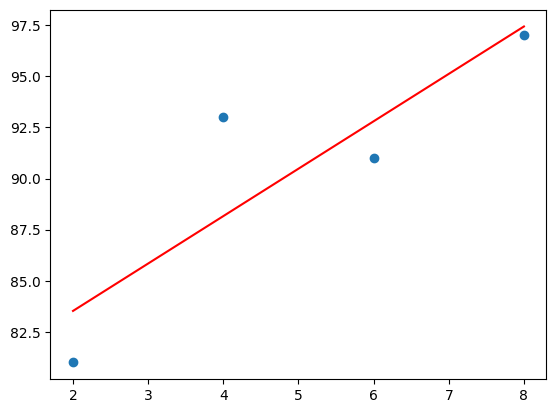

In [58]:
plt.scatter(x, y)
plt.plot(x, model.predict(x),'r')    # 예측 결과를 그래프로 나타냅니다.
plt.show()

In [59]:
model.get_weights()

[array([[2.3193889]], dtype=float32), array([78.88429], dtype=float32)]

In [60]:
model.predict([11]) # 100점 만점인데ㅋ..?

array([[104.39757]], dtype=float32)

In [61]:
x = np.array([[2, 0], [4, 4], [6, 2], [8, 3]])
y = np.array([81, 93, 91, 97])

In [62]:
model = Sequential()

In [63]:
model.add(Dense(1, input_dim=2, activation='linear'))

In [64]:
model.compile(optimizer='sgd', loss='mse')

In [65]:
model.fit(x,y,epochs=2000)

Epoch 1/2000
1/1 [==============================] - 0s 218ms/step - loss: 8690.4160
Epoch 2/2000
1/1 [==============================] - 0s 8ms/step - loss: 1469.8112
Epoch 3/2000
1/1 [==============================] - 0s 12ms/step - loss: 956.5380
Epoch 4/2000
1/1 [==============================] - 0s 18ms/step - loss: 915.0251
Epoch 5/2000
1/1 [==============================] - 0s 6ms/step - loss: 906.7258
Epoch 6/2000
1/1 [==============================] - 0s 12ms/step - loss: 900.7969
Epoch 7/2000
1/1 [==============================] - 0s 13ms/step - loss: 895.0691
Epoch 8/2000
1/1 [==============================] - 0s 12ms/step - loss: 889.3899
Epoch 9/2000
1/1 [==============================] - 0s 14ms/step - loss: 883.7476
Epoch 10/2000
1/1 [==============================] - 0s 7ms/step - loss: 878.1416
Epoch 11/2000
1/1 [==============================] - 0s 7ms/step - loss: 872.5715
Epoch 12/2000
1/1 [==============================] - 0s 6ms/step - loss: 867.0373
Epoch 13/2000
1

In [66]:
hour = 7
private_class = 4
prediction = model.predict([[hour, private_class]])

print("%.f시간을 공부하고 %.f시간의 과외를 받을 경우, 예상 점수는 %.02f점입니다" % (hour, private_class, prediction))

7시간을 공부하고 4시간의 과외를 받을 경우, 예상 점수는 97.53점입니다


In [68]:
x = np.array([2, 4, 6, 8, 10, 12, 14]) 
y = np.array([0, 0, 0, 1, 1, 1, 1]) # 1: 합격 0: 불합격
# 6시간 30분은 합격?

In [69]:
model = Sequential()
model.add(Dense(1,input_dim=1, activation='sigmoid')) # 1차원이므로 dim=1, 0~1이므로 시그모이드 사용

In [70]:
model.compile(optimizer='sgd', loss='binary_crossentropy')

In [71]:
model.fit(x,y, epochs=5000)

Epoch 1/5000
1/1 [==============================] - 0s 248ms/step - loss: 6.6070
Epoch 2/5000
1/1 [==============================] - 0s 13ms/step - loss: 6.2142
Epoch 3/5000
1/1 [==============================] - 0s 15ms/step - loss: 5.8225
Epoch 4/5000
1/1 [==============================] - 0s 12ms/step - loss: 5.4319
Epoch 5/5000
1/1 [==============================] - 0s 15ms/step - loss: 5.0428
Epoch 6/5000
1/1 [==============================] - 0s 12ms/step - loss: 4.6555
Epoch 7/5000
1/1 [==============================] - 0s 14ms/step - loss: 4.2706
Epoch 8/5000
1/1 [==============================] - 0s 7ms/step - loss: 3.8885
Epoch 9/5000
1/1 [==============================] - 0s 15ms/step - loss: 3.5103
Epoch 10/5000
1/1 [==============================] - 0s 14ms/step - loss: 3.1373
Epoch 11/5000
1/1 [==============================] - 0s 18ms/step - loss: 2.7715
Epoch 12/5000
1/1 [==============================] - 0s 16ms/step - loss: 2.4157
Epoch 13/5000
1/1 [==================

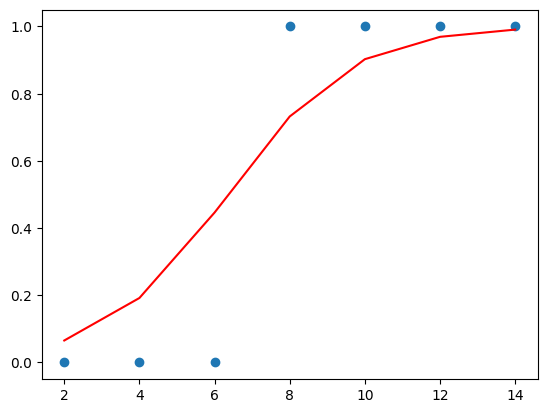

In [72]:
plt.scatter(x, y)
plt.plot(x, model.predict(x),'r')
plt.show()

In [73]:
#임의의 학습시간을 집어넣어 합격 예상 확률을 예측해 보겠습니다.

hour = 7
prediction = model.predict([hour])

print("%.f시간을 공부할 경우, 합격 예상 확률은 %.01f%%입니다" % (hour, prediction * 100))

7시간을 공부할 경우, 합격 예상 확률은 59.7%입니다


In [ ]:
# 연습문제
# 90, 90, 90 몇 점?
# 80, 85, 80 몇 점?
# 93, 92, 70 몇 점?

In [214]:
import pandas as pd
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import matplotlib.pyplot as plt

In [215]:
data = np.loadtxt('data-01-test-score.csv', delimiter=',')
data

array([[ 80.,  79.,  77., 149.],
       [ 93.,  88.,  93., 185.],
       [ 89.,  91.,  90., 180.],
       [ 96.,  98., 100., 196.],
       [ 73.,  66.,  70., 142.],
       [ 53.,  46.,  55., 101.],
       [ 69.,  74.,  77., 149.],
       [ 47.,  56.,  60., 115.],
       [ 87.,  79.,  90., 175.],
       [ 79.,  70.,  88., 164.],
       [ 69.,  70.,  73., 141.],
       [ 70.,  65.,  74., 141.],
       [ 93.,  95.,  91., 184.],
       [ 79.,  80.,  73., 152.],
       [ 70.,  73.,  78., 148.],
       [ 93.,  89.,  96., 192.],
       [ 78.,  75.,  68., 147.],
       [ 81.,  90.,  93., 183.],
       [ 88.,  92.,  86., 177.],
       [ 78.,  83.,  77., 159.],
       [ 82.,  86.,  90., 177.],
       [ 86.,  82.,  89., 175.],
       [ 78.,  83.,  85., 175.],
       [ 76.,  83.,  71., 149.],
       [ 96.,  93.,  95., 192.]])

In [216]:
X = data[:,:3]
y = data[:,3]

In [ ]:
# 90, 90, 90 몇 점?
# 80, 85, 80 몇 점?
# 93, 92, 70 몇 점?

In [217]:
model = Sequential()
model.add(Dense(32, input_dim=3, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='linear'))
model.compile(optimizer='adam', loss='mse')
model.fit(X, y, epochs=150)
# 몇번 돌려보니 loss값이 10정도 나왔음

Epoch 1/150
1/1 [==============================] - 0s 306ms/step - loss: 14168.8486
Epoch 2/150
1/1 [==============================] - 0s 13ms/step - loss: 13671.4287
Epoch 3/150
1/1 [==============================] - 0s 14ms/step - loss: 13180.3076
Epoch 4/150
1/1 [==============================] - 0s 16ms/step - loss: 12695.3672
Epoch 5/150
1/1 [==============================] - 0s 11ms/step - loss: 12220.0459
Epoch 6/150
1/1 [==============================] - 0s 15ms/step - loss: 11746.5938
Epoch 7/150
1/1 [==============================] - 0s 12ms/step - loss: 11277.5078
Epoch 8/150
1/1 [==============================] - 0s 14ms/step - loss: 10811.4951
Epoch 9/150
1/1 [==============================] - 0s 15ms/step - loss: 10351.8965
Epoch 10/150
1/1 [==============================] - 0s 13ms/step - loss: 9893.9902
Epoch 11/150
1/1 [==============================] - 0s 15ms/step - loss: 9444.8477
Epoch 12/150
1/1 [==============================] - 0s 11ms/step - loss: 9002.1904
Epo

In [226]:
print(model.predict([[90,90,90], [80,85,80], [93,92,70]]))

[[181.49728]
 [163.17152]
 [165.96631]]


In [219]:
# [[181.49728] 결과
#  [163.17152]
#  [165.96631]]

array([[158.20634 ],
       [185.689   ],
       [181.13872 ],
       [198.03894 ],
       [141.91519 ],
       [106.009964],
       [148.50099 ],
       [110.26046 ],
       [174.96669 ],
       [163.70932 ],
       [143.34872 ],
       [142.86046 ],
       [186.41393 ],
       [154.11055 ],
       [149.70024 ],
       [188.7761  ],
       [146.92624 ],
       [177.86725 ],
       [177.01959 ],
       [158.23146 ],
       [174.32414 ],
       [174.62474 ],
       [165.71    ],
       [151.15535 ],
       [191.57234 ]], dtype=float32)

Epoch 1/100
1/1 [==============================] - 0s 325ms/step - loss: 26722.2070
Epoch 2/100
1/1 [==============================] - 0s 6ms/step - loss: 26716.3945
Epoch 3/100
1/1 [==============================] - 0s 6ms/step - loss: 26710.5391
Epoch 4/100
1/1 [==============================] - 0s 14ms/step - loss: 26704.6094
Epoch 5/100
1/1 [==============================] - 0s 13ms/step - loss: 26698.6426
Epoch 6/100
1/1 [==============================] - 0s 13ms/step - loss: 26692.6602
Epoch 7/100
1/1 [==============================] - 0s 15ms/step - loss: 26686.6504
Epoch 8/100
1/1 [==============================] - 0s 8ms/step - loss: 26680.7891
Epoch 9/100
1/1 [==============================] - 0s 7ms/step - loss: 26674.8574
Epoch 10/100
1/1 [==============================] - 0s 7ms/step - loss: 26668.8633
Epoch 11/100
1/1 [==============================] - 0s 14ms/step - loss: 26662.8906
Epoch 12/100
1/1 [==============================] - 0s 8ms/step - loss: 26656.8301
Epoch 

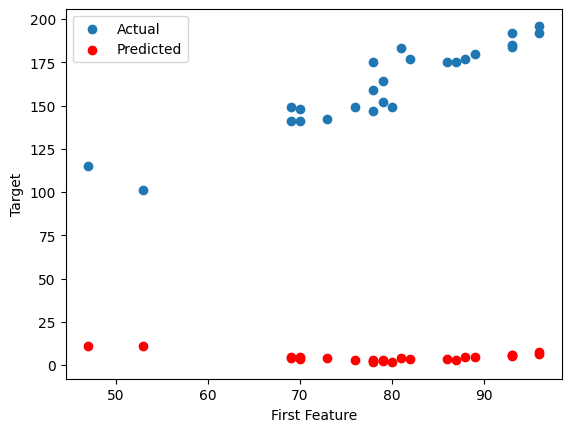

In [205]:
X = data[:,:3]
y = data[:,3]

from sklearn.preprocessing import StandardScaler
# 데이터 정규화
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 모델 정의
model = Sequential()
model.add(Dense(32, input_dim=3, activation='relu')) # activation을 'relu'로 변경
model.add(Dense(16, activation='relu')) # 중간 레이어 추가
model.add(Dense(1, activation='linear')) # 출력 레이어

# 모델 컴파일
model.compile(optimizer='adam', loss='mse') # optimizer를 'adam'으로 변경

# 모델 학습
model.fit(X_scaled, y, epochs=100, verbose=1)

# 예측
y_pred = model.predict(X_scaled)

# 시각화
plt.scatter(X[:, 0], y, label='Actual')
plt.scatter(X[:, 0], y_pred, label='Predicted', color='r')
plt.xlabel('First Feature')
plt.ylabel('Target')
plt.legend()
plt.show()

In [270]:
x1 = X[:,0]
x2 = X[:,1]
x3 = X[:,2]

In [271]:
a1 = 0
a2 = 0
a3 = 0
b = 0
lr = 1e-6
epochs = 15000

In [272]:
for i in range(epochs):
    y_pred = a1 * x1 + a2 * x2 + a3 * x3 + b      
    error = y - y_pred                  
    
    a1_diff = (2/n) * sum(-x1 * (error))
    a2_diff = (2/n) * sum(-x2 * (error))
    a3_diff = (2/n) * sum(-x3 * (error))
    b_diff = (2/n) * sum(-(error))
    
    a1 = a1 - lr * a1_diff
    a2 = a2 - lr * a2_diff
    a3 = a3 - lr * a3_diff
    b = b - lr * b_diff
    if i % 100 == 0: 
        print("epoch=%.f, 기울기1=%.04f, 기울기2=%.04f, 기울기3=%.04f, 절편=%.04f" % (i, a1, a2, a3, b))

epoch=0, 기울기1=0.1639, 기울기2=0.1641, 기울기3=0.1684, 절편=0.0020
epoch=100, 기울기1=0.6611, 기울기2=0.6628, 기울기3=0.6970, 절편=0.0082
epoch=200, 기울기1=0.6549, 기울기2=0.6573, 기울기3=0.7085, 절편=0.0082
epoch=300, 기울기1=0.6488, 기울기2=0.6519, 기울기3=0.7197, 절편=0.0081
epoch=400, 기울기1=0.6428, 기울기2=0.6467, 기울기3=0.7306, 절편=0.0081
epoch=500, 기울기1=0.6369, 기울기2=0.6417, 기울기3=0.7412, 절편=0.0080
epoch=600, 기울기1=0.6311, 기울기2=0.6369, 기울기3=0.7516, 절편=0.0080
epoch=700, 기울기1=0.6254, 기울기2=0.6322, 기울기3=0.7617, 절편=0.0079
epoch=800, 기울기1=0.6198, 기울기2=0.6276, 기울기3=0.7716, 절편=0.0079
epoch=900, 기울기1=0.6143, 기울기2=0.6233, 기울기3=0.7812, 절편=0.0078
epoch=1000, 기울기1=0.6090, 기울기2=0.6190, 기울기3=0.7906, 절편=0.0078
epoch=1100, 기울기1=0.6037, 기울기2=0.6149, 기울기3=0.7997, 절편=0.0077
epoch=1200, 기울기1=0.5985, 기울기2=0.6110, 기울기3=0.8086, 절편=0.0077
epoch=1300, 기울기1=0.5934, 기울기2=0.6072, 기울기3=0.8173, 절편=0.0076
epoch=1400, 기울기1=0.5884, 기울기2=0.6035, 기울기3=0.8258, 절편=0.0076
epoch=1500, 기울기1=0.5834, 기울기2=0.5999, 기울기3=0.8341, 절편=0.0075
epoch=1600, 기울기1=0.5786, 기울기2=0.5965

In [273]:
print(y)
y_pred

[149. 185. 180. 196. 142. 101. 149. 115. 175. 164. 141. 141. 184. 152.
 148. 192. 147. 183. 177. 159. 177. 175. 175. 149. 192.]


array([156.73253758, 184.22954826, 181.01610083, 198.55274926,
       139.52599475, 105.12930067, 150.50536853, 114.18508376,
       174.07559284, 164.42294739, 143.78084251, 142.64784278,
       185.58057417, 152.29844401, 151.46716388, 188.22554524,
       143.5647251 , 181.34020921, 176.58200726, 158.17120989,
       176.10117731, 174.16119503, 167.43067179, 150.5704907 ,
       190.14709173])

In [281]:
def predict(lst):
    x1, x2, x3 = lst
    return a1 * x1 + a2 * x2 + a3 * x3 + b 
print(predict([90,90,90])) # 180.82045492850557
print(predict([80,85,80])) # 163.34702793109946
print(predict([93,92,70])) # 159.70329870552297

180.82045492850557
163.34702793109946
159.70329870552297
